<a href="https://colab.research.google.com/github/AnnieRU0k/life_coach/blob/main/Brazil_housing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [ ]:
df1 = pd.read_csv("data.csv")
df1.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [ ]:
df1.dropna(inplace=True)
df1.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [ ]:
df1["rent_usd"] = (df1["rent"] * 0.19).round(2)
df1["rent_usd"].head()

,rent_usd
0,456.0
1,195.7
2,760.0
3,332.5
4,760.0


In [ ]:
df1.drop(columns=["rent"], inplace=True)
df1.dropna(inplace=True)
df1.head()

,address,district,area,bedrooms,garage,type,total,rent_usd
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2939,456.0
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1345,195.7
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4661,760.0
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1954,332.5
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4654,760.0


In [ ]:
df1["usd_total"] = (df1["total"] * 0.19).round(2)
df1["usd_total"].head()

,usd_total
0,558.41
1,255.55
2,885.59
3,371.26
4,884.26


In [ ]:
df1.drop(columns=["total"], inplace=True)
df1.dropna(inplace=True)
df1.head()

,address,district,area,bedrooms,garage,type,rent_usd,usd_total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,456.0,558.41
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,195.7,255.55
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,760.0,885.59
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,332.5,371.26
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,760.0,884.26


In [ ]:
summary_stats = df1[["area", "rent_usd"]].describe()
summary_stats

,area,rent_usd
count,11657.000000,11657.000000
mean,84.655658,617.654810
std,74.020536,503.635196
min,0.000000,95.000000
25%,40.000000,302.100000
50%,60.000000,458.850000
75%,96.000000,722.000000
max,580.000000,4750.000000


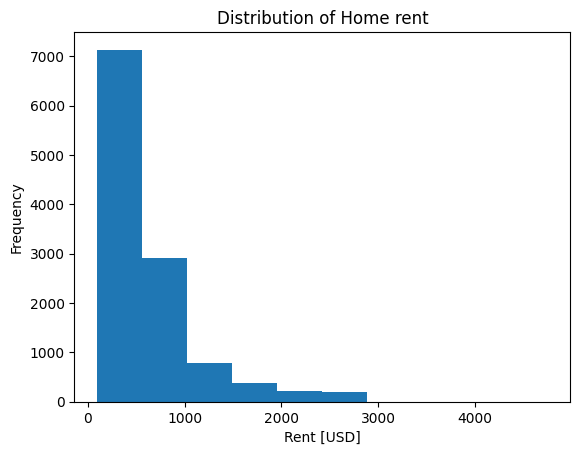

In [ ]:
plt.hist(df1["rent_usd"])
plt.xlabel("Rent [USD]")
plt.ylabel("Frequency")
plt.title("Distribution of Home rent")
plt.show()

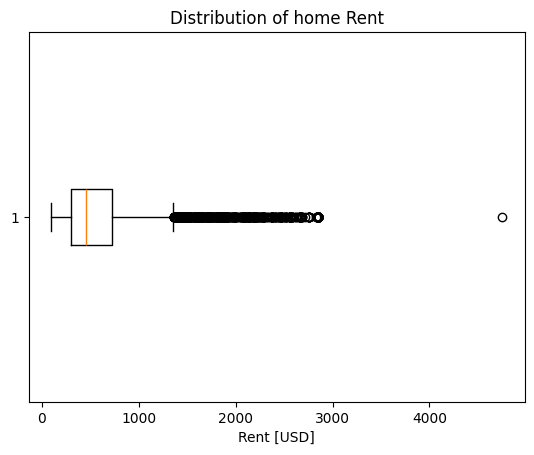

In [ ]:
plt.boxplot(df1["rent_usd"], vert=False)
plt.xlabel("Rent [USD]")
plt.title("Distribution of home Rent")
plt.show()

In [ ]:
mean_rent_by_address = df1.groupby("address")["rent_usd"].mean().sort_values()
mean_rent_by_address

,rent_usd
address,
Rua Arraial de São Bartolomeu,95.00
Rua Manoel Oliveira Gonçalves,95.00
Rua Manuel José Rodrigues,95.00
Rua Felipe Mosca,95.76
Rua Ameixeiras,104.50
...,...
Rua Convenção de Itu,2850.00
Rua Senador Vergueiro,2850.00
Rua Catanduva,2850.00


In [ ]:
mean_rent_by_district = df1.groupby("district")["rent_usd"].mean().sort_values()
mean_rent_by_district

,rent_usd
district,
Jardim Jaçanã,95.00
Jardim Inga,114.00
Jardim Frei Galvão,119.51
Jardim Maraba,119.70
Vila Lais,125.40
...,...
Alphaville Residencial Um,2565.00
Residencial Cinco (alphaville),2584.00
Jardim Tango,2850.00


<Axes: title={'center': 'Mean Home Rent by Address'}, xlabel='address', ylabel='rent_usd'>

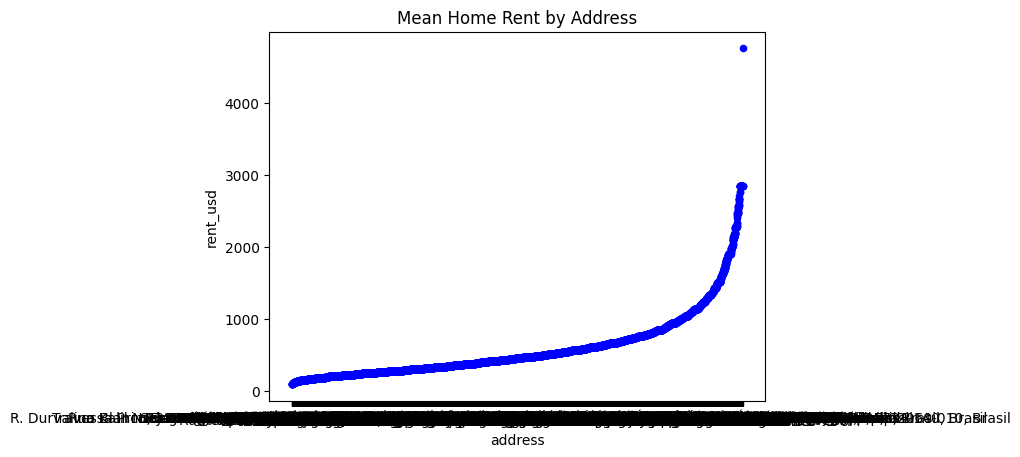

In [ ]:
df_rent_by_address = mean_rent_by_address.reset_index()
df_rent_by_address.plot(kind="scatter", x="address", y="rent_usd", color="blue", title="Mean Home Rent by Address")

In [ ]:
df_centro = df1[df1["district"] == "Centro"]
df_centro.head()

,address,district,area,bedrooms,garage,type,rent_usd,usd_total
7,Avenida Cásper Líbero,Centro,26,1,0,Studio e kitnet,328.13,426.36
27,Avenida Cásper Líbero,Centro,25,1,0,Studio e kitnet,399.00,488.49
94,Avenida Prestes Maia,Centro,37,1,0,Studio e kitnet,209.00,364.42
119,Rua João Adolfo,Centro,26,1,0,Studio e kitnet,332.50,416.86
146,Rua Martins Fontes,Centro,30,1,0,Apartamento,494.00,589.00


In [ ]:
homes_by_district = df_centro["district"].value_counts()
homes_by_district

,count
district,
Centro,178


In [ ]:
centro_districts = ["Avenida Cásper Líbero", "Rua João Adolfo", "Rua Martins Fontes"]
centro_districts_corr = {}
for district in centro_districts:
    df_districts = df_centro[df_centro["district"] == district]
    corr = df_districts["area"].corr(df_districts["rent_usd"])
    centro_districts_corr[district] = corr

print(centro_districts_corr)

{'Avenida Cásper Líbero': nan, 'Rua João Adolfo': nan, 'Rua Martins Fontes': nan}
